# K-Means Clustering

## Importing the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [16]:
datasets = pd.read_csv('datasets.csv')

In [17]:
datasets.head()

,Kabupaten Kota,Akses Sanitasi Layak (%),Akses Sumber Air Minum Layak (%)
0,Nias,19.93,47.79
1,Mandailing Natal,35.73,73.78
2,Tapanuli Selatan,46.41,67.39
3,Tapanuli Tengah,57.56,68.81
4,Tapanuli Utara,83.79,89.06


In [18]:
x = datasets.iloc[:, [1,2]].values

In [19]:
x

array([[19.93, 47.79],
       [35.73, 73.78],
       [46.41, 67.39],
       [57.56, 68.81],
       [83.79, 89.06],
       [89.54, 95.04],
       [81.5 , 94.34],
       [89.09, 95.78],
       [91.75, 99.74],
       [92.35, 91.9 ],
       [84.33, 91.43],
       [96.37, 98.18],
       [80.76, 92.51],
       [13.14, 66.21],
       [91.65, 91.95],
       [90.14, 70.69],
       [91.09, 65.64],
       [93.19, 98.14],
       [88.04, 97.83],
       [67.17, 77.58],
       [59.62, 77.84],
       [84.85, 84.66],
       [79.75, 86.75],
       [46.09, 58.17],
       [38.02, 71.52],
       [32.33, 92.4 ],
       [89.07, 87.2 ],
       [88.49, 99.78],
       [95.88, 99.35],
       [92.71, 98.8 ],
       [95.21, 99.76],
       [51.33, 54.13],
       [45.13, 74.11]])

## Using the Elbow Method to find the optimal number of clusters

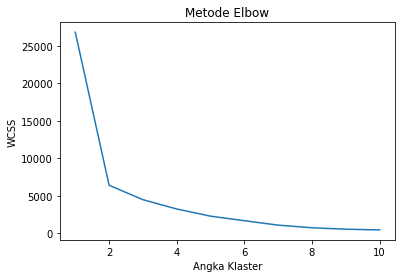

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
labels = kmeans.labels_
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Angka Klaster')
plt.ylabel('WCSS')
plt.show();

In [21]:
score = silhouette_score(x, labels)
score

0.4265781868831563

## Training the K-Means Model on the dataset

In [22]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [23]:
print(y_kmeans)

[2 0 0 0 1 1 1 1 1 1 1 1 1 2 1 3 3 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0]


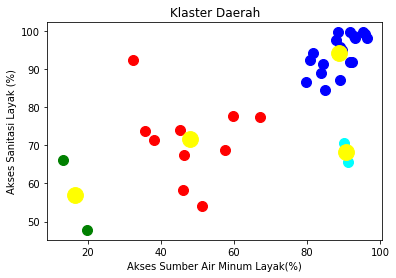

In [28]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c ='red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c ='green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c ='cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', label = 'Centroids')
plt.title('Klaster Daerah')
plt.xlabel('Akses Sumber Air Minum Layak(%)')
plt.ylabel('Akses Sanitasi Layak (%)')
plt.show();

In [29]:
datasets[y_kmeans == 2]

,Kabupaten Kota,Akses Sanitasi Layak (%),Akses Sumber Air Minum Layak (%)
0,Nias,19.93,47.79
13,Nias Selatan,13.14,66.21


Dapat dilihat dari gambar grafik diatas terdapat 2 daerah yang memiliki persentase akses sanitasi dan sumber air minum yang relatif rendah, daerah tersebut yaitu Nias dan Nias Selatan. Dari hasil dari penelitian ini diharapkan dapat menyusun kebijakan dan program peningkatan akses sanitasi dan air bersih bagi masyarakat khususnya pada daerah Nias dan Nias Selatan.